In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [76]:
import numpy as np
import pandas as pd
import os
data=pd.read_csv("/kaggle/input/test-file/tested.csv")
print(data.head)
data.columns

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                         

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [77]:
print(data.dtypes)
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Unique values in column 'PassengerId': [ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1

In [78]:
import seaborn as sns
dummy=pd.get_dummies(data['Sex'],dtype=int)
print(dummy)

     female  male
0         0     1
1         1     0
2         0     1
3         0     1
4         1     0
..      ...   ...
413       0     1
414       1     0
415       0     1
416       0     1
417       0     1

[418 rows x 2 columns]


In [79]:
data=pd.concat([data,dummy],axis="columns")
print(data)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [80]:
#percentage of null values in each columns
null_percent=data.isnull().mean()*100
print(null_percent)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
female          0.000000
male            0.000000
dtype: float64


In [81]:
#since the cabin has more nan values dropping will be beneficial
data=data.drop(['Name','Ticket','PassengerId','Cabin','Sex'],axis=1)

Here Until now what I did is that Converted the categorical to numerical values using dummy varibales and drop useless columns that effect the ml model.Aslo dropped the columns having more null values.Now cleaning the age

In [82]:
data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'female', 'male'],
      dtype='object')

In [83]:
from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median'

# Fit and transform the 'Age' column
data['Age'] = imputer.fit_transform(data[['Age']])

In [84]:
#percentage of null values in each columns
null_percent=data.isnull().mean()*100
print(null_percent)

Survived    0.000000
Pclass      0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.239234
Embarked    0.000000
female      0.000000
male        0.000000
dtype: float64


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Create a new feature 'family_total'
data['family_total'] = data['Parch'] + data['SibSp']


In [87]:

print(data.head())

   Survived  Pclass   Age     Fare Embarked  female  male
0         0       3  34.5   7.8292        Q       0     1
1         1       3  47.0   7.0000        S       1     0
2         0       2  62.0   9.6875        Q       0     1
3         0       3  27.0   8.6625        S       0     1
4         1       3  22.0  12.2875        S       1     0


In [90]:
import math

# Apply math.ceil to the 'fare' column
data['Fare'] = data['Fare'].apply(lambda x: math.ceil(x) if pd.notnull(x) else x)

# Apply math.ceil to the 'age' column
data['Age'] = data['Age'].apply(lambda x: math.ceil(x) if pd.notnull(x) else x)
print(data.head())

   Survived  Pclass  Age  Fare Embarked  female  male
0         0       3   35   8.0        Q       0     1
1         1       3   47   7.0        S       1     0
2         0       2   62  10.0        Q       0     1
3         0       3   27   9.0        S       0     1
4         1       3   22  13.0        S       1     0


In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[['Pclass', 'Age']] = scaler.fit_transform(data[['Pclass', 'Age']])



In [93]:
data.head()

,Survived,Pclass,Age,Fare,Embarked,female,male
0,0,0.873482,0.361228,8.0,Q,0,1
1,1,0.873482,1.312867,7.0,S,1,0
2,0,-0.315819,2.502415,10.0,Q,0,1
3,0,0.873482,-0.273198,9.0,S,0,1
4,1,0.873482,-0.669714,13.0,S,1,0


In [95]:
# Map 'Embarked' to 0, 1, and 2
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [97]:
data_cleaned=data
print(f"The fresh cleaned data is \n :{data_cleaned}")

The fresh cleaned data is 
 :     Survived    Pclass       Age   Fare  Embarked  female  male
0           0  0.873482  0.361228    8.0         2       0     1
1           1  0.873482  1.312867    7.0         0       1     0
2           0 -0.315819  2.502415   10.0         2       0     1
3           0  0.873482 -0.273198    9.0         0       0     1
4           1  0.873482 -0.669714   13.0         0       1     0
..        ...       ...       ...    ...       ...     ...   ...
413         0  0.873482  0.044015    9.0         0       0     1
414         1 -1.505120  0.678441  109.0         1       1     0
415         0  0.873482  0.678441    8.0         0       0     1
416         0  0.873482  0.044015    9.0         0       0     1
417         0  0.873482  0.044015   23.0         1       0     1

[418 rows x 7 columns]


In [105]:
# Fill missing values in the 'Fare' column with the mean of 'Fare'
data_cleaned['Fare'].fillna(data_cleaned['Fare'].mean(), inplace=True)

# Verify if missing values are filled
print(data_cleaned.isnull().sum())


Survived    0
Pclass      0
Age         0
Fare        0
Embarked    0
female      0
male        0
dtype: int64


In [106]:
from sklearn.model_selection import train_test_split

# Assuming 'data_cleaned' is your DataFrame and you want to split it into features (X) and target (y)
X = data_cleaned.drop('Survived', axis=1)  # Features (excluding target variable 'Survived')
y = data_cleaned['Survived']  # Target variable

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Splitted successfully")


Splitted successfully


Decision Tree Accuracy: 1.0000


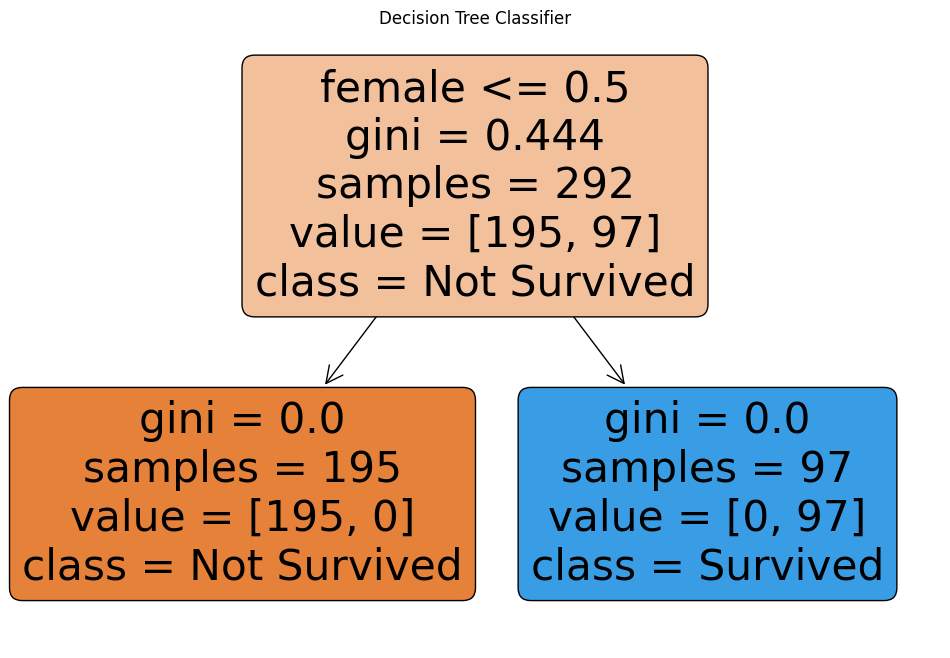

In [112]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(max_depth=9)
clf.fit(X_train, y_train)

# Print the accuracy score on the test set
accuracy = clf.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

In [113]:
# Get the number of rows in the DataFrame
num_rows = data_cleaned.shape[0]
print(f"Number of rows: {num_rows}")


Number of rows: 418


so total 418 rows of data, 70% training and 30% test ,train-292 and test=126

In [127]:
from imblearn.over_sampling import SMOTE
# Assuming 'X' and 'y' are your features and labels respectively
X = data_cleaned.drop('Survived', axis=1)  # Features
y = data_cleaned['Survived']  # Target variable
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Perform stratified split on the balanced data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced, random_state=42)


532 532
0.91875
Classification Report:
              precision    recall  f1-score   support

Not Survived       0.95      0.89      0.92        80
    Survived       0.89      0.95      0.92        80

    accuracy                           0.92       160
   macro avg       0.92      0.92      0.92       160
weighted avg       0.92      0.92      0.92       160

F1 Score: 0.9212
Accuracy: 0.9187


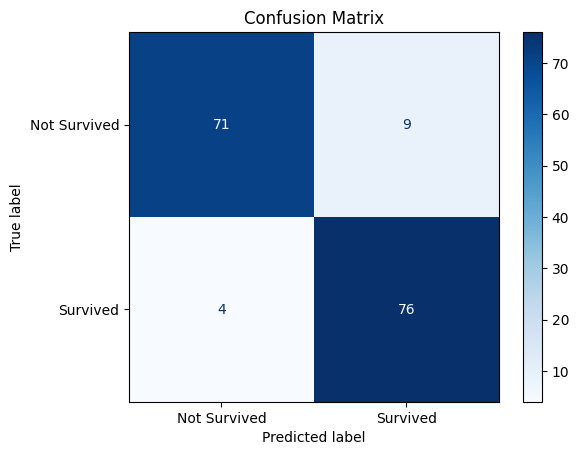

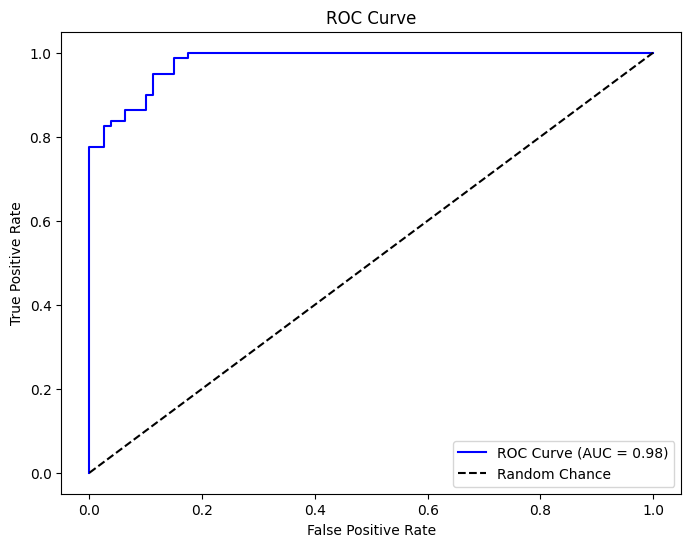

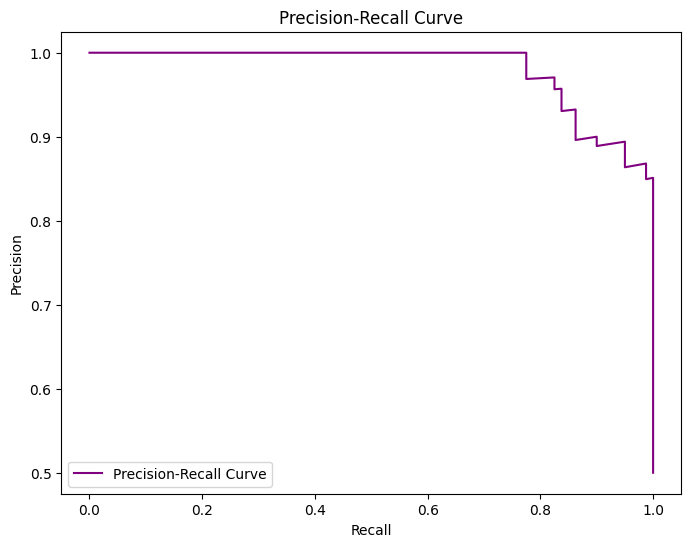

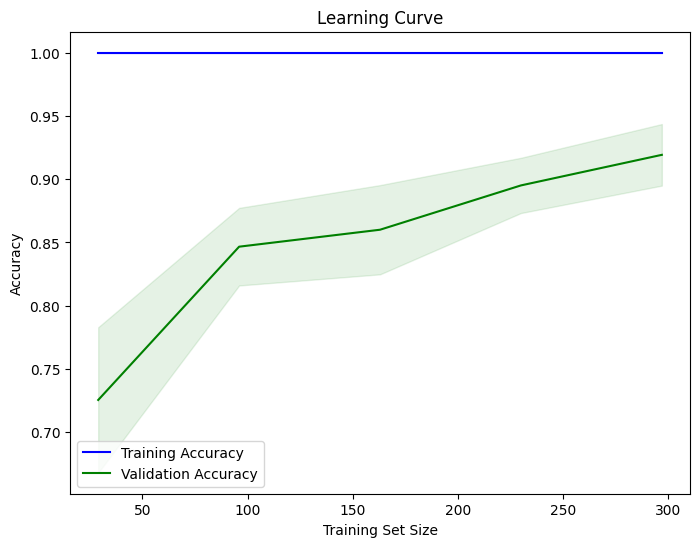

In [134]:
print(X_balanced.shape[0],y_balanced.shape[0])
from sklearn.gaussian_process import GaussianProcessClassifier
model = GaussianProcessClassifier()
model.fit(X_train, y_train.values.ravel())
print(model.score(X_test, y_test.values.ravel()))
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    f1_score, 
    accuracy_score, 
    roc_curve, 
    auc, 
    precision_recall_curve
)
from sklearn.model_selection import learning_curve

# 1. Predictions and Probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# 2. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

# 3. F1 Score and Accuracy
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 5. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# 7. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate mean and std of scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


Classification Report:
              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00        80
    Survived       1.00      1.00      1.00        80

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



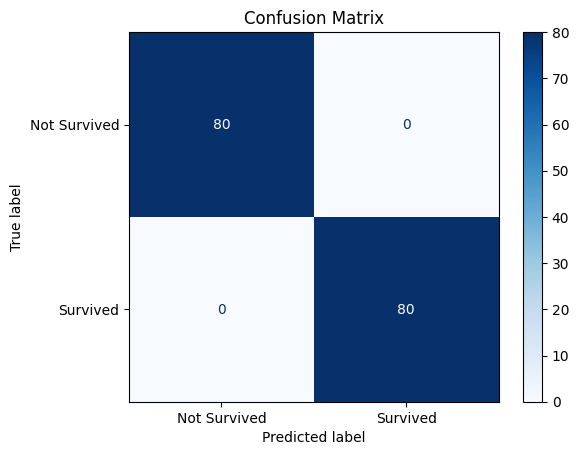

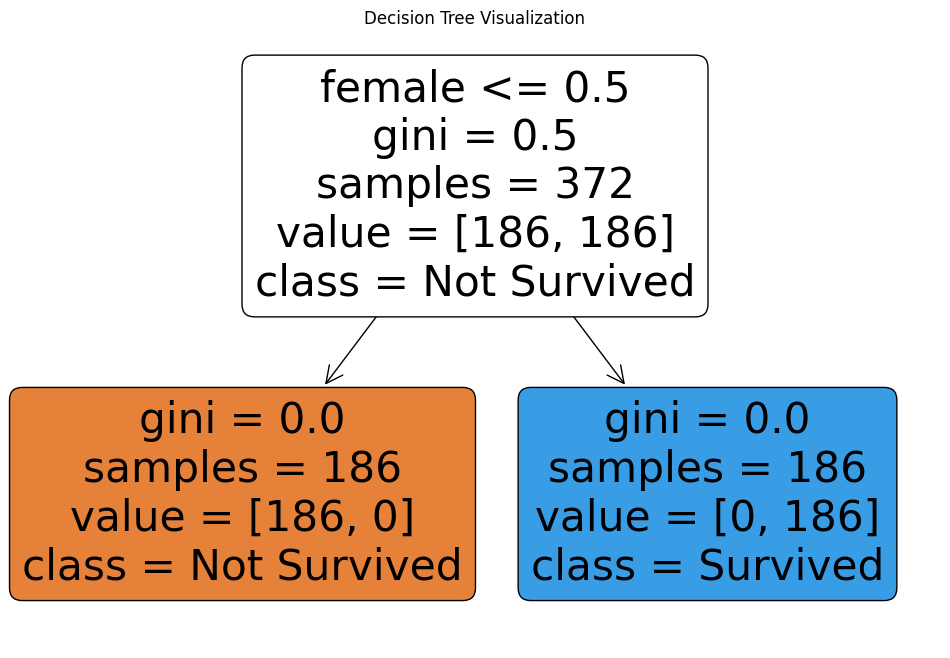

Decision Tree Accuracy: 1.0000


In [137]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
# Assuming 'X' and 'y' are your features and labels respectively
X = data_cleaned.drop('Survived', axis=1)  # Features
y = data_cleaned['Survived']  # Target variable
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Perform stratified split on the balanced data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced, random_state=42)


# 1. Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# 2. Train the model
clf.fit(X_train, y_train)

# 3. Evaluate the model
y_pred = clf.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 4. Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf, 
    feature_names=X_train.columns, 
    class_names=['Not Survived', 'Survived'], 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

# 5. Print Accuracy
accuracy = clf.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00        80
    Survived       1.00      1.00      1.00        80

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



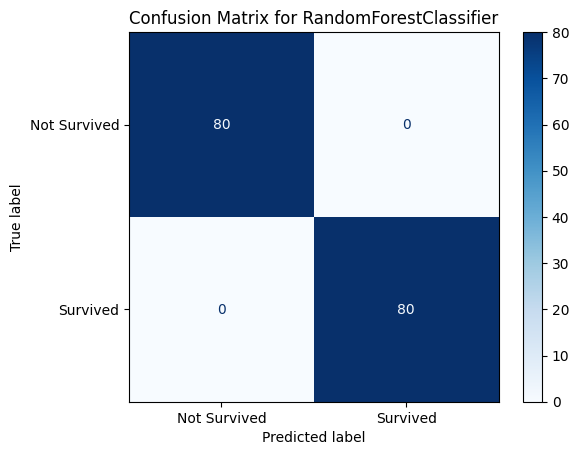

RandomForestClassifier Accuracy: 1.0000


In [139]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize the Classifier (Replace this line for different models)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for {model.__class__.__name__}")
plt.show()

# Accuracy
accuracy = model.score(X_test, y_test)
print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

Not Survived       0.95      0.78      0.86        80
    Survived       0.81      0.96      0.88        80

    accuracy                           0.87       160
   macro avg       0.88      0.87      0.87       160
weighted avg       0.88      0.87      0.87       160



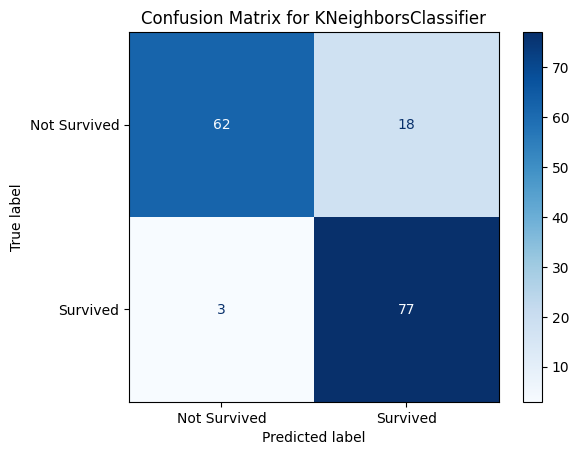

KNeighborsClassifier Accuracy: 0.8688


In [140]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier  # Correct import for KNN

# Initialize the Classifier (K-Nearest Neighbors)
model = KNeighborsClassifier(n_neighbors=5)  # Example with 5 neighbors

# Train the Model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for {model.__class__.__name__}")
plt.show()

# Accuracy
accuracy = model.score(X_test, y_test)
print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00        80
    Survived       1.00      1.00      1.00        80

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



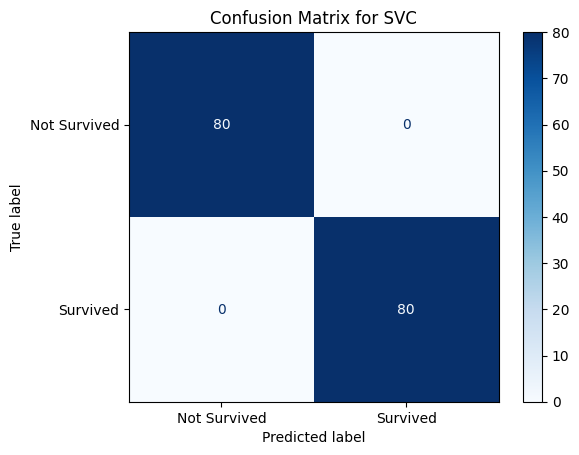

SVC Accuracy: 1.0000


In [141]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)

# Train the Model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for {model.__class__.__name__}")
plt.show()

# Accuracy
accuracy = model.score(X_test, y_test)
print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00        80
    Survived       1.00      1.00      1.00        80

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



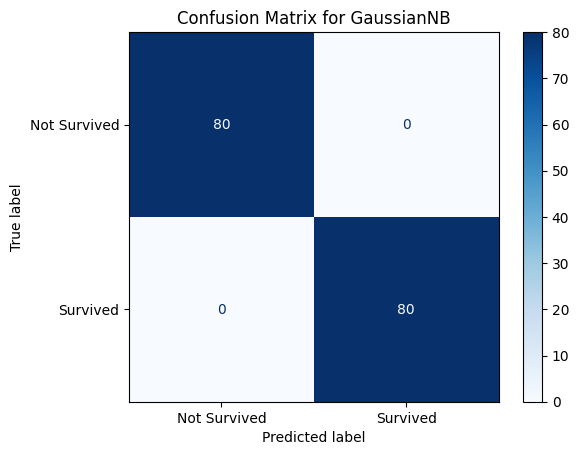

GaussianNB Accuracy: 1.0000


In [142]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


# Train the Model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for {model.__class__.__name__}")
plt.show()

# Accuracy
accuracy = model.score(X_test, y_test)
print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")


In [144]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
model = GradientBoostingClassifier(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best Accuracy: 1.0
Test Accuracy: 1.0


In [ ]:
'''The accuracies achieved by different models are:
Decision tree:1.0
GradientBoostinClassifier:1.0
Svc:1.0
Knn:0.86
randomforest:1.0
gussainprocessclassifer:0.91'''